In [1]:
def make_visualization(id, df):
	import numpy as np
	import pandas as pd
	import matplotlib.pyplot as plt
	from scipy.stats import percentileofscore
	
	key_notation = {0: 'C', 1: 'C-sharp', 2: 'D', 3: 'D-sharp',
                4: 'E', 5: 'F', 6: 'F-sharp', 7: 'G', 8: 'G-sharp',
                9: 'A', 10: 'B-flat', 11: 'B'}
	mode_notation = {0: 'Minor', 1: 'Major'}

	df2 = df.drop(['id', 'artist', 'track', 'loudness', 'tempo'], axis=1)
	loudness = percentileofscore(df['loudness'], df.loc[id, 'loudness']) / 100
	tempo = percentileofscore(df['tempo'], df.loc[id, 'tempo']) / 100
	features = [loudness, tempo]
	for column in df2.columns:
	    features.append(df2.loc[id, column])
    
	fig, ax = plt.subplots()
	fig.set_size_inches(10,5)
	ax.bar(x=np.arange(9), height=features)
	ax.set_ylim(0,1)
	ax.set_xticks(np.arange(9))
	ax.set_xticklabels(['loudness', 'tempo'] + df2.columns.tolist(), rotation=45)
	ax.set_yticks([0, 0.5, 1])
	ax.set_yticklabels(['Low', 'Medium', 'High'])
	ax.text(x=-0.5, y=features[0]+0.05, s=f'{np.round(df.loc[id, 'loudness'], 1)} dB', fontsize=12)
	ax.text(x=0.6, y=features[1]+0.05, s=f'{df.loc[id, 'tempo']} BPM', fontsize=12)
	ax.text(x=3, y=0.9, s=f'Pitch: {key_notation[df.loc[id, 'key']]} {mode_notation[df.loc[id, 'mode']}',
        	fontsize=12)
	ax.text(x=3, y=0.8, s=f'Time signature: {int(df.loc[id, 'time_signature'])} / 4', fontsize=12)
	ax.text(x=3, y=0.7, s=f'Duration: {np.round(df.loc[id, 'duration_ms'] / 3600, 2)} minutes', fontsize=12)
	
	return fig, ax

SyntaxError: invalid syntax (<ipython-input-1-a78361a27bba>, line 27)

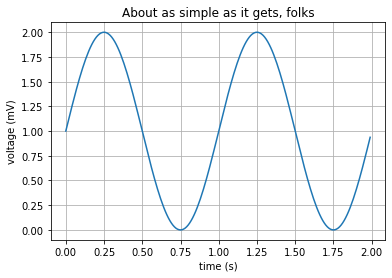

In [5]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig(f"./images/{id}.png")
plt.show()

In [11]:
import pandas as pd

song_list = pd.read_csv("./song_list5.csv")

In [12]:
df = song_list.reset_index()

In [17]:
df = df.rename(columns={"index": "id"})

In [22]:
df.head()

,id,songid,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,5X4Qm0rVLcZeeO4tSDmBg3,Jack Bruce,Running Thro' Our Hands,0.456,0.255,9.0,-15.805,1.0,0.0480,0.94600,0.170000,0.951,0.0532,116.424,253067.0,4.0
1,1,1pNpt53PZPet9dvJN3RKGr,Prefuse 73,Parachute Panador,0.535,0.806,7.0,-10.289,1.0,0.0642,0.00436,0.019100,0.457,0.3760,90.089,63733.0,4.0
2,2,3oxz2oCzAWdPzA6In2zA5u,Pasion Vega,La Gata Bajo La Lluvia,0.294,0.482,5.0,-6.406,1.0,0.0430,0.46300,0.000000,0.335,0.2040,166.693,255280.0,3.0
3,3,05JGVUwt7XJk5FPqH0Wsch,Jonny Lang,Walking Away,0.563,0.631,0.0,-5.144,1.0,0.0324,0.06350,0.000008,0.163,0.5400,115.657,254827.0,4.0
4,4,3xdgCFMTn6ut8fZYxfAuR0,Skye,All the Promises,0.358,0.611,2.0,-9.752,0.0,0.0454,0.51500,0.000468,0.149,0.1640,171.596,256933.0,4.0


In [27]:
def make_visualization(id, df):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.stats import percentileofscore
    key_notation = {0: 'C', 1: 'C-sharp', 2: 'D', 3: 'D-sharp',
                4: 'E', 5: 'F', 6: 'F-sharp', 7: 'G', 8: 'G-sharp',
                9: 'A', 10: 'B-flat', 11: 'B'}
    mode_notation = {0: 'Minor', 1: 'Major'}
    df2 = df.drop(['id', 'artist', 'track', 'loudness', 'tempo', 'key', 'mode', 'time_signature', 'duration_ms','songid'], axis=1)
    loudness = percentileofscore(df['loudness'], df.loc[id, 'loudness']) / 100
    tempo = percentileofscore(df['tempo'], df.loc[id, 'tempo']) / 100
    features = [loudness, tempo]
    for column in df2.columns:
        features.append(df2.loc[id, column])
    
    fig, ax = plt.subplots()
    fig.set_size_inches(10,5)
    ax.bar(x=np.arange(9), height=features)
    ax.set_ylim(0,1)
    ax.set_xticks(np.arange(9))
    ax.set_xticklabels(['loudness', 'tempo'] + df2.columns.tolist(), rotation=45)
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels(['Low', 'Medium', 'High'])
    ax.text(x=-0.4, y=features[0]+0.05, s=f'{np.round(df.loudness[id], 1)} dB',
            fontsize=12, color='r', fontweight='bold')
    ax.text(x=0.6, y=features[1]+0.05, s=f'{np.round(df.tempo[id], 2)} BPM',
            fontsize=12, color='r', fontweight='bold')
    ax.text(x=3, y=0.9, s=f"Pitch: {key_notation[df.loc[id, 'key']]} {mode_notation[df.loc[id, 'mode']]}",
            fontsize=12, color='r', fontweight='bold')
    ax.text(x=3, y=0.8, s=f'Time signature: {int(df.time_signature[id])} / 4',
            fontsize=12, color='r', fontweight='bold')
    ax.text(x=3, y=0.7, s=f'Duration: {np.round(df.duration_ms[id] / 3600, 2)} minutes',
            fontsize=12, color='r', fontweight='bold')
    plt.savefig(f"./images/{id}.png")

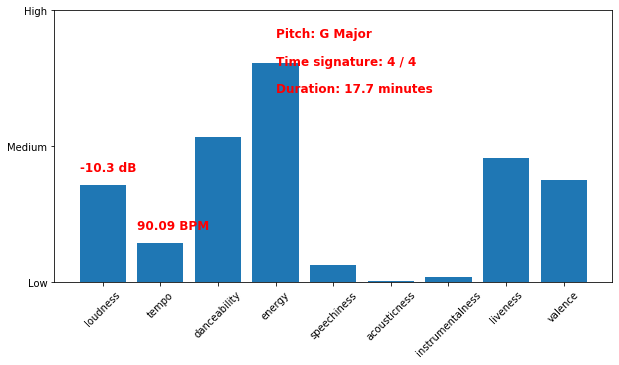

In [28]:
make_visualization(1,df)

In [29]:
df.to_pickle("./for_images.pkl")